[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[  1.   4.   9.  16.  25.  38.  45.  62.  86. 100.]
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 141
    # data points      = 10
    # variables        = 3
    chi-square         = 9.51767760
    reduced chi-square = 1.35966823
    Akaike info crit   = 5.50565777
    Bayesian info crit = 6.41341305
##  Warning: uncertainties could not be estimated:
    a:  at boundary
    b:  at boundary
[[Variables]]
    a:  5.3712e-09 (init = 0.1)
    b:  2.4093e-09 (init = 0.1)
    c:  1.01065436 (init = 0.8)


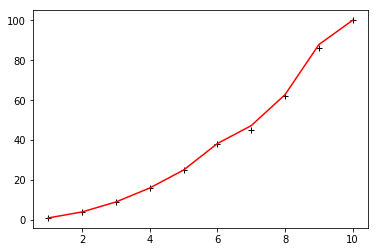

In [34]:
import numpy as np
#matplotlib 
from numpy import cos, sin
import matplotlib.pyplot as plt
#Import math module
#import math
#Import LMfit to minimize chi^2.
import lmfit
from lmfit import Minimizer, Parameters, report_fit
#from lmfit import minimize, Parameters

X,Y = np.loadtxt('Test.txt', skiprows=0, unpack=True)

print(X)
print(Y)

def Parabola(X,a,b,c):
    pars = [a,b,c]
    Y = (pars[0] + pars[1] * X + pars[2] * X ** 2) #Also works!
    #Y = (a + b * X + c * X ** 2) #works!
    return Y

#d=5

#def chi2(params, Q0ch,Q1ch,Q2ch,Q3ch,Q4ch,Q5ch,Q6ch,Q7ch,Q8ch,Q9ch,Q10ch,Q11ch,Q0m,Q1m,Q2m,Q3m,Q4m,Q5m,Q6m,Q7m,Q8m,Q9m,Q10m,Q11m):
def chi2(params, X, Y):
    
    a = params['a']
    b = params['b']
    c = params['c']
    
    #delta = (sigexp-XS(E0[0],theta[0]))/uncertainty
    #delta = (Y - (a + b * X + c * X ** 2))/0.001  #Works!
    delta = (Y - Parabola(X,a,b,c))/3  #Also works!
    chi2 = delta ** 2
    
    return chi2

params = Parameters()
params.add('a', value=0.1, min=0)
params.add('b', value=0.1, min=0)
params.add('c', value=0.8, min=0)

minner = Minimizer(chi2, params, fcn_args=(X, Y))
result = minner.minimize()
final = Y + result.residual
report_fit(result)

#lmfit.printfuncs.report_fit(minner.params, min_correl=0.5)

plt.plot(X,Y,'k+')
plt.plot(X,final,'r')
plt.show()

In [ ]:
from lmfit import  